# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
mouse_table = pd.DataFrame(merged_data)
mouse_table.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
num_mice = merged_data["Mouse ID"].nunique()
num_mice

249

In [3]:
# Identify duplicate mice by Mouse ID and Timepoint
duplicate_mice_ids = merged_data[merged_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]["Mouse ID"].unique()
print(duplicate_mice_ids)

['g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice = merged_data[merged_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
duplicate_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID
duplicate_mouse = merged_data.loc[merged_data["Mouse ID"] != "g989"]
# Display the clean DataFrame
duplicate_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame.
num_mice2 = duplicate_mouse["Mouse ID"].nunique()
num_mice2

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
regimen_grouped = duplicate_mouse.groupby('Drug Regimen')

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
summary_stats_df = regimen_grouped['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Rename the columns for clarity
summary_stats_df = summary_stats_df.rename(columns={
    'mean': 'Mean Tumor Volume',
    'median': 'Median Tumor Volume',
    'var': 'Tumor Volume Variance',
    'std': 'Tumor Volume Std. Dev.',
    'sem': 'Tumor Volume Std. Err.'
})

# Assemble the resulting series into a single summary DataFrame.
summary_stats_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_df = duplicate_mouse.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Display the summary statistics table
summary_stats_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

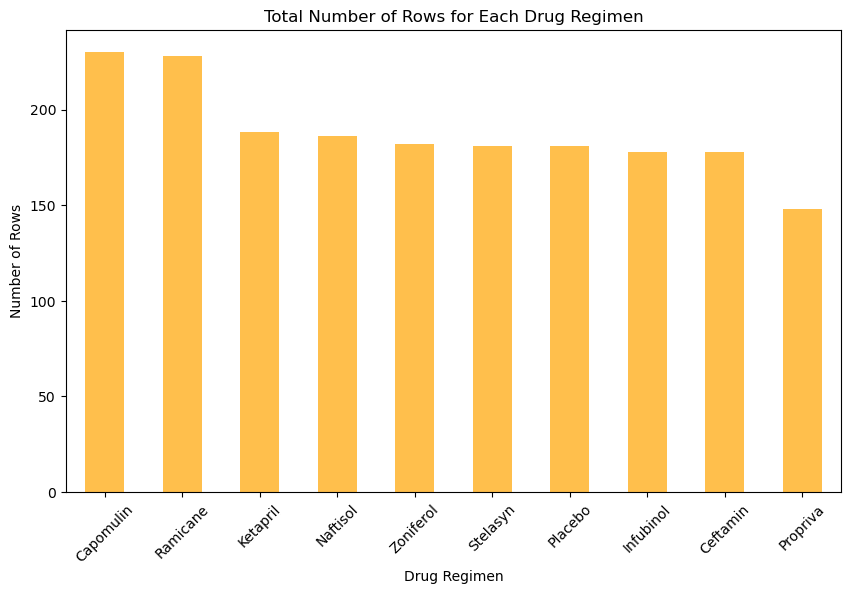

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Count the number of rows for each drug regimen
regimen_counts = duplicate_mouse['Drug Regimen'].value_counts()

# Create a bar plot
regimen_counts.plot(kind='bar', color='orange', alpha=0.7, figsize=(10, 6), rot=45)

# Add labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.title('Total Number of Rows for Each Drug Regimen')

# Show the plot
plt.show()

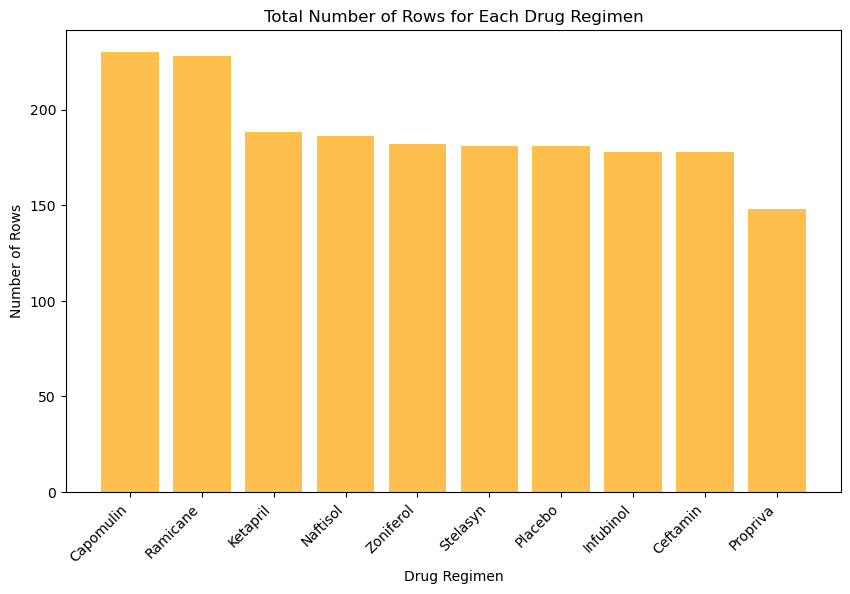

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Count the number of rows for each drug regimen
regimen_counts = duplicate_mouse['Drug Regimen'].value_counts()

# Create a bar plot using pyplot
plt.figure(figsize=(10, 6))
plt.bar(regimen_counts.index, regimen_counts, color='orange', alpha=0.7)

# Add labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.title('Total Number of Rows for Each Drug Regimen')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

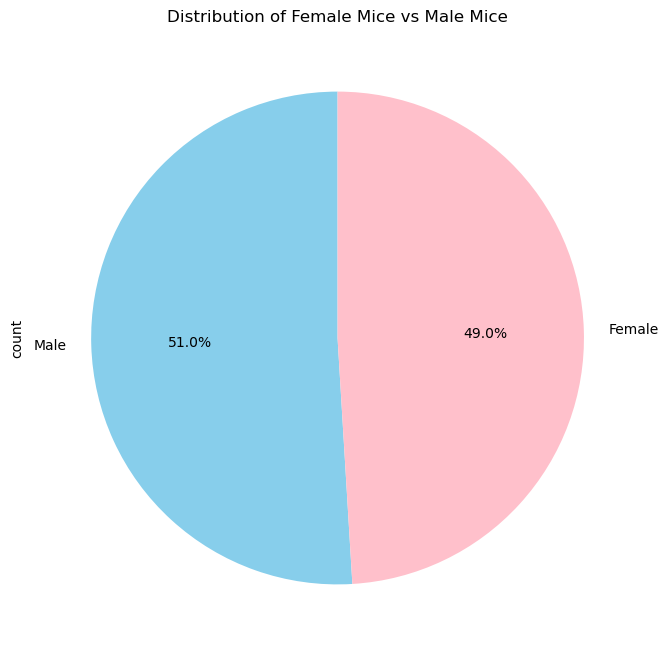

In [11]:
# Count the number of male and female mice
sex_distribution = duplicate_mouse['Sex'].value_counts()

# Create a pie plot using pandas
sex_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'pink'], startangle=90, figsize=(8, 8))

# Add title
plt.title('Distribution of Female Mice vs Male Mice')

# Show the plot
plt.show()

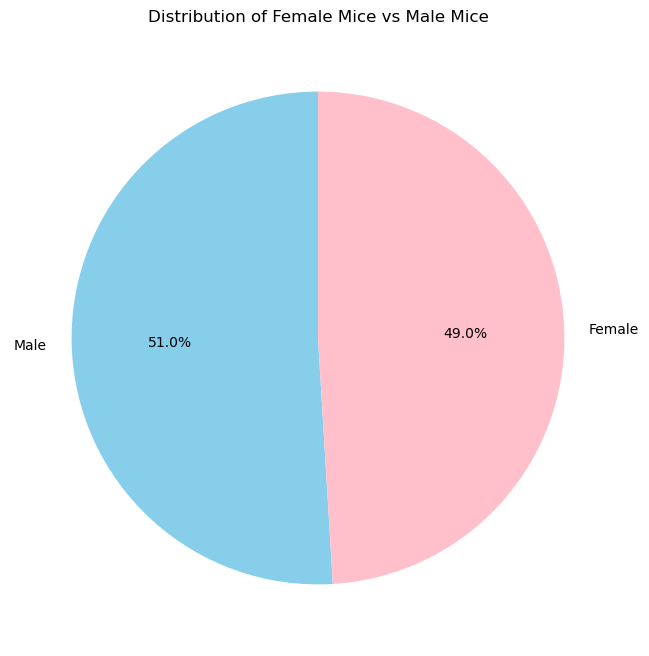

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Count the number of male and female mice
sex_distribution = duplicate_mouse['Sex'].value_counts()

# Create a pie plot using pyplot
plt.figure(figsize=(8, 8))
plt.pie(sex_distribution, labels=sex_distribution.index, autopct='%1.1f%%', colors=['skyblue', 'pink'], startangle=90)

# Add title
plt.title('Distribution of Female Mice vs Male Mice')

# Show the plot
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = duplicate_mouse.groupby('Mouse ID')['Timepoint'].max()

last_timepoint_df = pd.DataFrame(last_timepoint)

# Merge this group DataFrame with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoint_df, duplicate_mouse, on=['Mouse ID', 'Timepoint'], how='left')

# Capomulin, Ramicane, Infubinol, and Ceftamin
selected_regimens = final_tumor_volume[final_tumor_volume['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]

# Display the final DataFrame with the last tumor volume for each mouse in the selected treatment regimens
selected_regimens

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
3,a275,45,62.999356,3,Ceftamin,Female,20,28
6,a411,45,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
238,y769,45,68.594745,4,Ceftamin,Female,6,27
239,y793,45,31.896238,2,Capomulin,Male,17,17
240,y865,45,64.729837,3,Ceftamin,Male,23,26
244,z578,45,30.638696,0,Ramicane,Male,11,16


In [15]:
# Put treatments into a list for a for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create an empty list to fill with tumor volume data (for plotting)
tumor_vol_data = []

# Loop through each treatment
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    subset_data = selected_regimens[selected_regimens['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    
    # Add subset data to the list
    tumor_vol_data.append(subset_data)
    
    # Calculate the IQR and quantitatively determine if there are any potential outliers
    quartiles = subset_data.quantile([0.25, 0.5, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    
    # Determine outliers using upper and lower bounds
    lower_bound = lower_q - 1.5 * iqr
    upper_bound = upper_q + 1.5 * iqr
    
    # Print results
    print(f"\nTreatment: {treatment}")
    print(f"Interquartile Range (IQR): {iqr}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    
    # Check for potential outliers
    potential_outliers = subset_data[(subset_data < lower_bound) | (subset_data > upper_bound)]
    print(f"Potential Outliers: {potential_outliers}")

# Display the tumor volume data
tumor_vol_data


Treatment: Capomulin
Interquartile Range (IQR): 7.781863460000004
Lower Bound: 20.70456164999999
Upper Bound: 51.83201549
Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Treatment: Ramicane
Interquartile Range (IQR): 9.098536719999998
Lower Bound: 17.912664470000003
Upper Bound: 54.30681135
Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Treatment: Infubinol
Interquartile Range (IQR): 11.477135160000003
Lower Bound: 36.83290494999999
Upper Bound: 82.74144559000001
Potential Outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64

Treatment: Ceftamin
Interquartile Range (IQR): 15.577752179999997
Lower Bound: 25.355449580000002
Upper Bound: 87.66645829999999
Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


[19     38.982878
 24     38.939633
 61     30.485985
 64     37.074024
 66     40.159220
 80     47.685963
 83     37.311846
 85     38.125164
 87     38.753265
 108    41.483008
 115    38.846876
 121    28.430964
 124    33.329098
 162    46.539206
 163    32.377357
 169    41.581521
 174    23.343598
 180    40.728578
 183    34.455298
 192    31.023923
 204    40.658124
 208    39.952347
 220    36.041047
 226    28.484033
 239    31.896238
 Name: Tumor Volume (mm3), dtype: float64,
 6      38.407618
 7      43.047543
 10     38.810366
 12     32.978522
 33     38.342008
 37     33.397653
 45     37.311236
 52     40.659006
 70     29.128472
 76     33.562402
 77     36.374510
 91     31.560470
 93     36.134852
 96     22.050126
 119    30.564625
 126    31.095335
 157    45.220869
 158    36.561652
 166    37.225650
 168    43.419381
 177    30.276232
 190    40.667713
 217    43.166373
 235    44.183451
 244    30.638696
 Name: Tumor Volume (mm3), dtype: float64,
 0      67.973

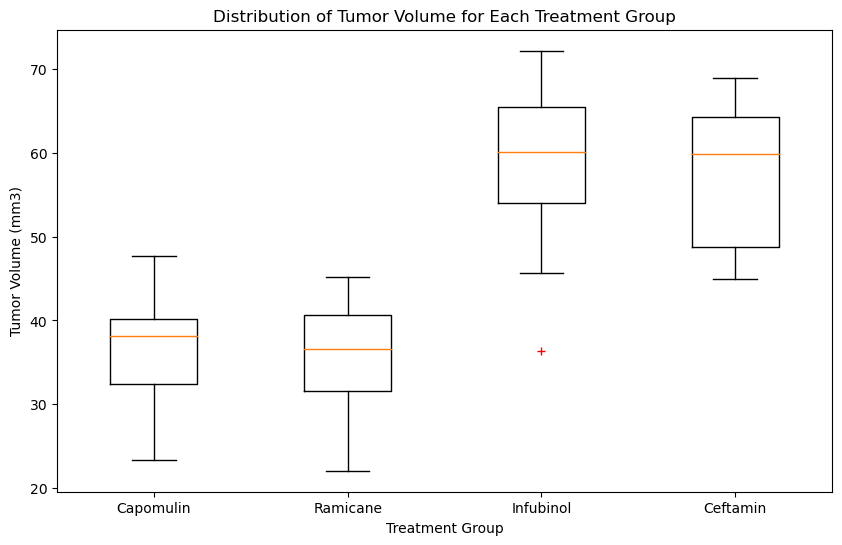

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Create a box plot
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_vol_data, labels=treatments, sym='r+')  # sym='r+' shows potential outliers as red plus signs

# Add labels and title
plt.xlabel('Treatment Group')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Distribution of Tumor Volume for Each Treatment Group')

# Show the plot
plt.show()

## Line and Scatter Plots

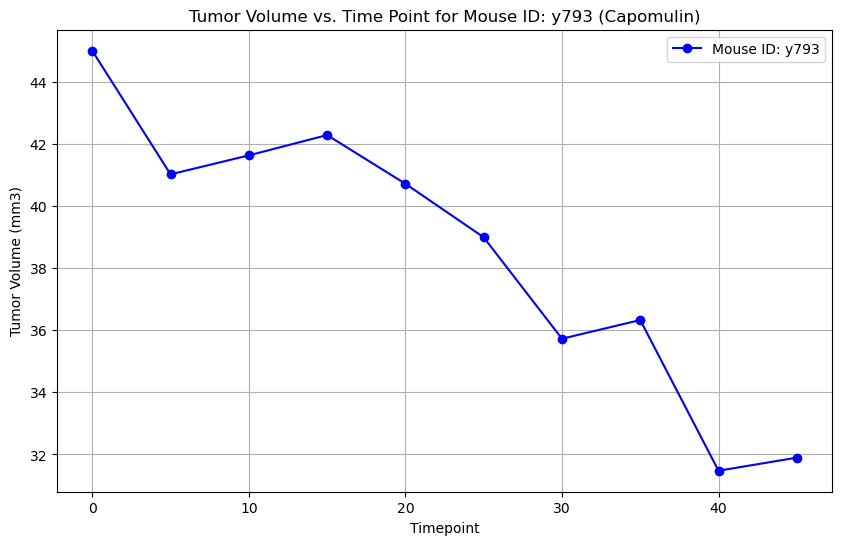

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Select a single mouse treated with Capomulin
mouse_id_capomulin = 'y793'
capomulin_data = duplicate_mouse[(duplicate_mouse['Drug Regimen'] == 'Capomulin') & (duplicate_mouse['Mouse ID'] == mouse_id_capomulin)]

# Create a line plot for tumor volume vs. time point
plt.figure(figsize=(10, 6))
plt.plot(capomulin_data['Timepoint'], capomulin_data['Tumor Volume (mm3)'], marker='o', color='b', label=f'Mouse ID: {mouse_id_capomulin}')

# Add labels and title
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Tumor Volume vs. Time Point for Mouse ID: {mouse_id_capomulin} (Capomulin)')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

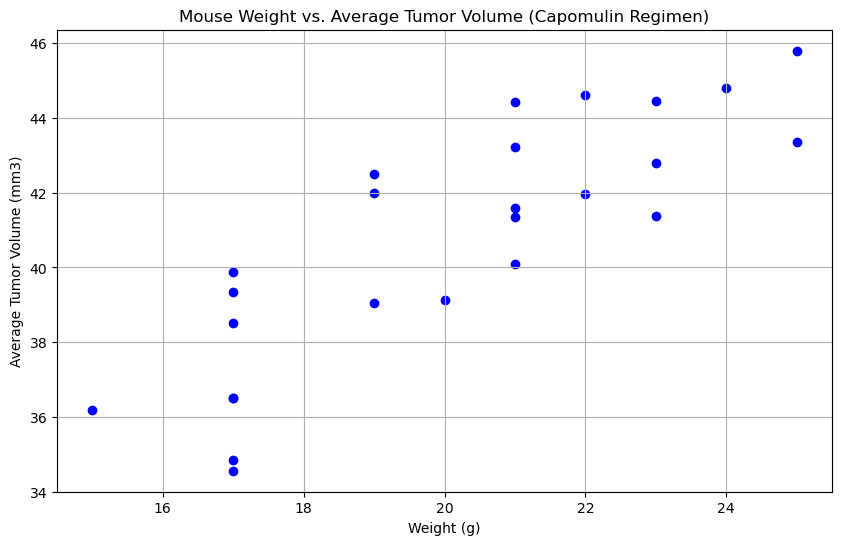

In [18]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Select data for the Capomulin regimen
capomulin_data = duplicate_mouse[duplicate_mouse['Drug Regimen'] == 'Capomulin']

# Calculate the average observed tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Merge the average tumor volume with the weight data
merged_data = pd.merge(average_tumor_volume, capomulin_data[['Mouse ID', 'Weight (g)']], on='Mouse ID', how='left').drop_duplicates()

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], color='b', marker='o')

# Add labels and title
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')

# Show the plot
plt.grid(True)
plt.show()

## Correlation and Regression

Correlation Coefficient: 0.5881275121987516


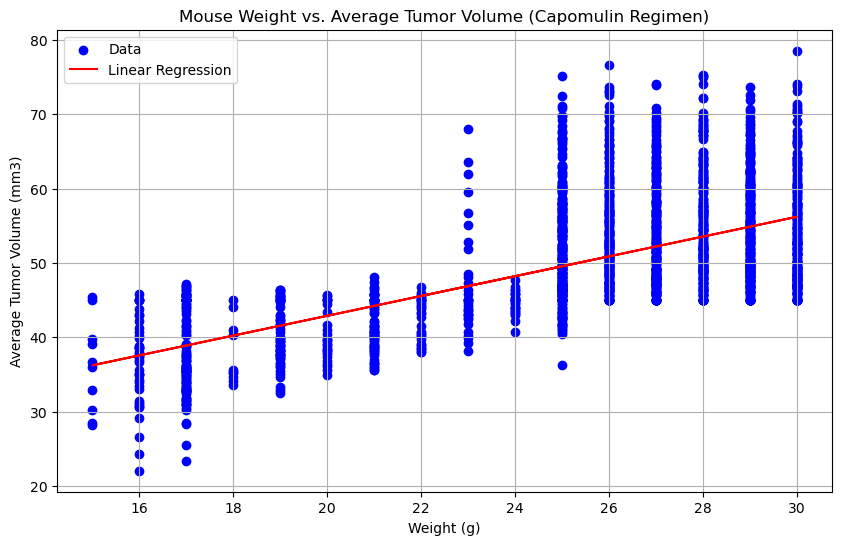

In [19]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import pearsonr, linregress

# Assuming your DataFrame is named merged_data

# Calculate the correlation coefficient
correlation_coefficient, _ = pearsonr(duplicate_mouse['Weight (g)'], duplicate_mouse['Tumor Volume (mm3)'])
print(f'Correlation Coefficient: {correlation_coefficient}')

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(duplicate_mouse['Weight (g)'], duplicate_mouse['Tumor Volume (mm3)'])

# Create a linear regression line
regression_line = slope * duplicate_mouse['Weight (g)'] + intercept

# Plot the scatter plot with the regression line
plt.figure(figsize=(10, 6))
plt.scatter(duplicate_mouse['Weight (g)'], duplicate_mouse['Tumor Volume (mm3)'], color='b', marker='o', label='Data')
plt.plot(duplicate_mouse['Weight (g)'], regression_line, color='r', label='Linear Regression')

# Add labels and title
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')

# Add legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()